In [ ]:
!unzip "drive/MyDrive/dog-vision/dog-breed-identification.zip" -d "drive/MyDrive/dog-vision/"

Archive:  drive/MyDrive/dog-vision/dog-breed-identification.zip
replace drive/MyDrive/dog-vision/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace drive/MyDrive/dog-vision/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
n
^C


# End to end Multi class Dog Breed Classification

#1.Problem
Identifying the breed of a dog given an image of the given dog.

#2 Data
The data we're using is from Kaggle's dog breed identification compeititon

#3 Evaluation

The evaluation is a file with predicition  probabilities for each dog of each test image.

#4 Features

Some info about the data L
* We're dealing with unstructured data(images)
*There are 120 breeds of dogs
*Training set data contains around 10000+ images.
*There are 10,000+ images in the test set

## Get out workplace ready

* Import Tensorflow version 2.x
* Import Tensorflow hub
* Make sure we're using GPU

In [ ]:
# Import Tensorflow into a Colab
import tensorflow as tf
print("TF version:",tf.__version__)

TF version: 2.17.1


In [ ]:
import tensorflow_hub as hub
print("TF version:",hub.__version__)

TF version: 0.16.1


In [ ]:
# Check for GPU availability
print("GPU","available (YES!!!!!) " if tf.config.list_physical_devices("GPU") else "not available" )

GPU available (YES!!!!!) 


## Getting our data ready (turning it into tenses)


In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

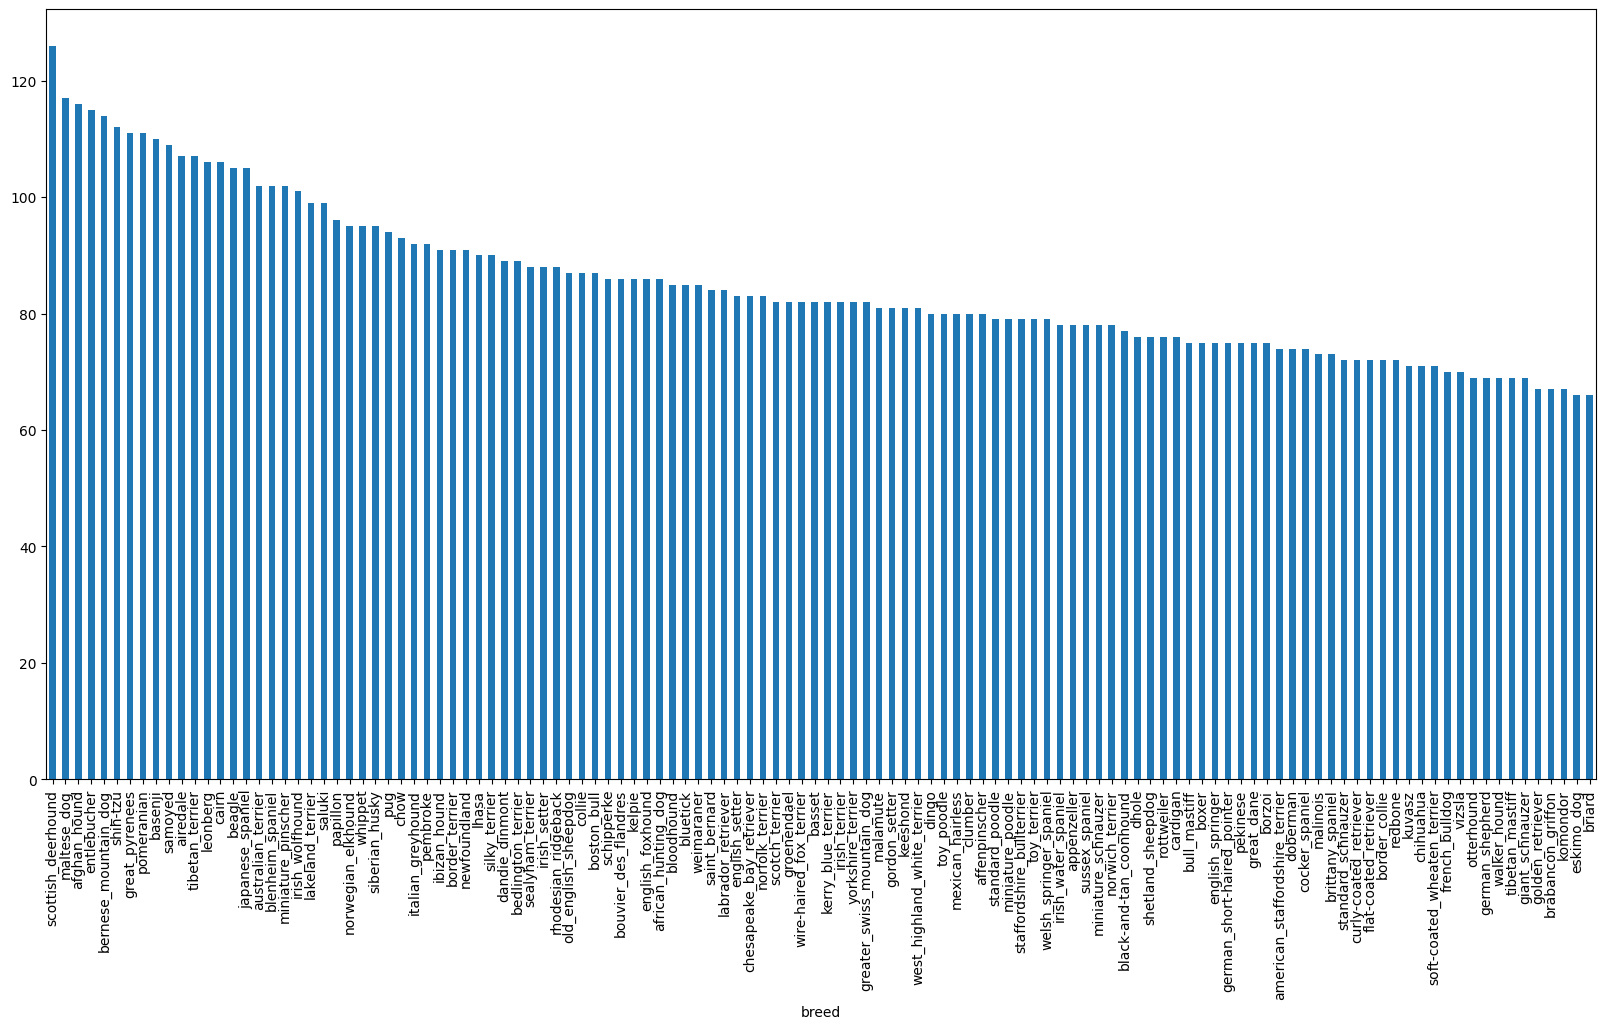

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

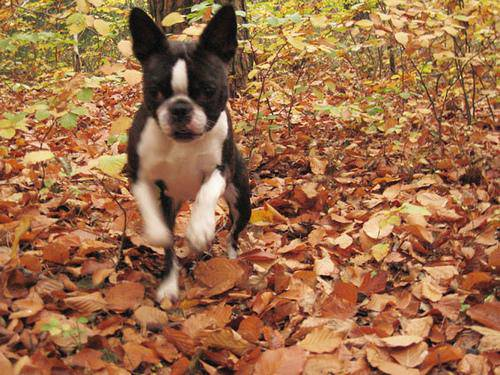

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

In [ ]:
filename = ["/content/drive/MyDrive/dog-vision/train/"+fname +".jpg" for fname in labels_csv["id"]]

filename[:10]


['/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/dog-vision/train/")) == len(filename):
  print("FIlenames match actual amount of files!! Proceed.")
else:
  print("Filenames missing")


FIlenames match actual amount of files!! Proceed.


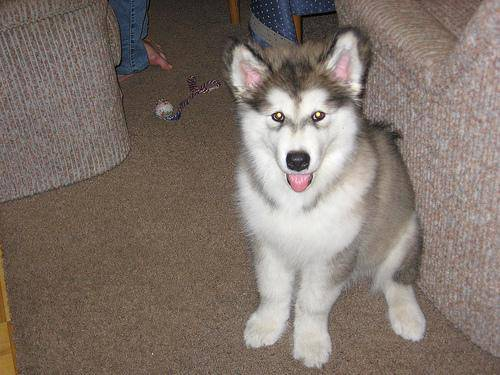

In [ ]:
#Checking one more time
Image(filename[3000])


In [ ]:
labels_csv["breed"][1]

'dingo'

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# Check if no. of labels matches number of filenames
if len(labels) == len(filename):
  print("Number of labels matches no. of filenames")
else:
  print("NUmber of labels does not match no.of filenames ,check data directories! ")

Number of labels matches no. of filenames


In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
#Turn a sinle label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#Turn every label into a boolean array
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Turning boolean arrays into integers
print(labels[0])
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Since the dataset in Kaggle doesn't contain a validation set,we're going to create our own

In [ ]:
#Setup x & y varivales
x = filename
y = boolean_labels
len(filename)

10222

In [ ]:
#Setup no. of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000}


In [ ]:
#Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

#Split them into traininf of total size NUM_IMAGES
x_train,x_val,y_train,y_val= train_test_split(x[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

## Preprocessing Images (turning images into Tensor)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
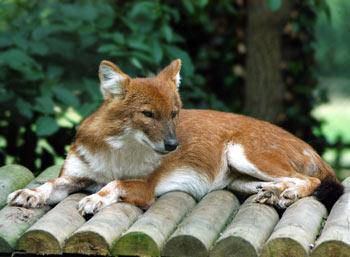

In [ ]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image

In [ ]:
image.max()

255

In [ ]:
#Turn images into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor
  """
  #Read in an image file
  image= tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red,Green,Blue)
  image = tf.image.decode_jpeg(image,channels=3)
  #Convert the colour channel values from 0~255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  #Reize the image to our desired value (224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
tensor = tf.io.read_file(filename[26])
### String



## Turning our data into batches

All 10,00 images might not fit into memory.
So that's why we do about 32(batch size) images at a time

Need our data in the form of Tensor Tuples

In [ ]:
def get_image_label(image_path,label):
  """
  Takes an image file path name and the associated label,processes the image and returns a tuple of (image,label)
  """
  image = process_image(image_path)
  return image,label

In [ ]:
process_image(x[42]),tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
#Define the batch start
BATCH_SIZE=32

# Create a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of images (x) and labels (y) pairs.
  Shuffles the dat if it's training data but doesn't shuffle if its validation data.
  Also accepts test data s input (no labels).
  """
  #If the data is a test data set we don't have labels
  if test_data:
    print("Creating test data batches....")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If the data is a valid dataset,we don't needto shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  # If the data is a training dataset,we don't need to shuffle it
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))

    #Shuffling pathanames and labels before imaging processor
    data  = data.shuffle(buffer_size=len(x))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [ ]:
# Create training and validation batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x = x_val,y= y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches
Our data is now in batches ,however,these can be a little hard to understand/comprehend,let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

#Create a function for viewing a image
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  #Setup the figure
  plt.figure(figsize = (10,10))
  for i in range(25):
    # Create subplots (5 rows,5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines off


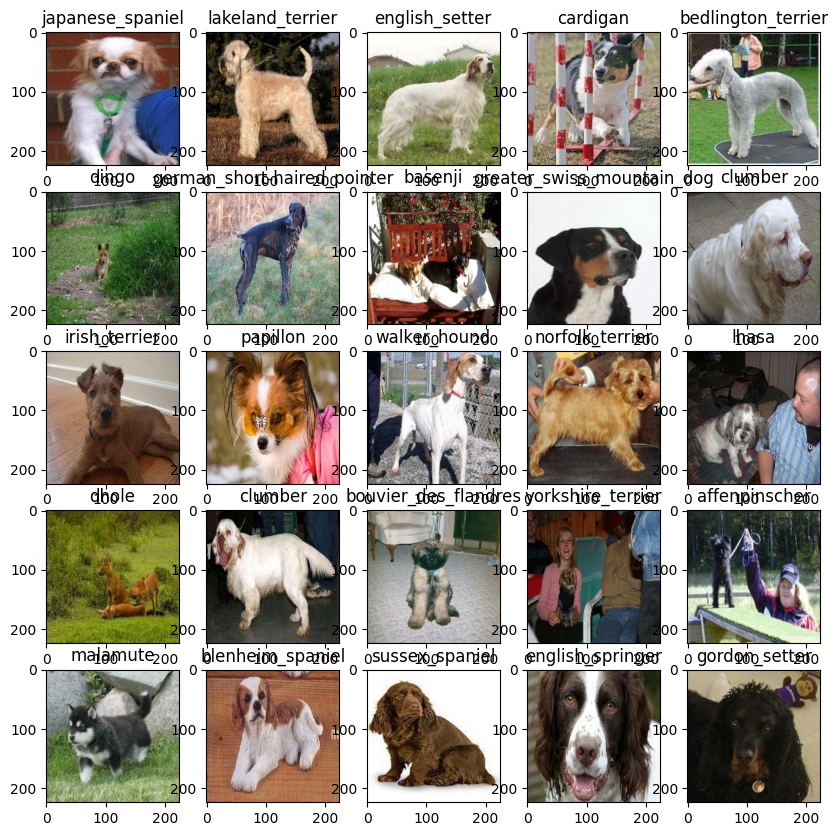

In [ ]:
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)


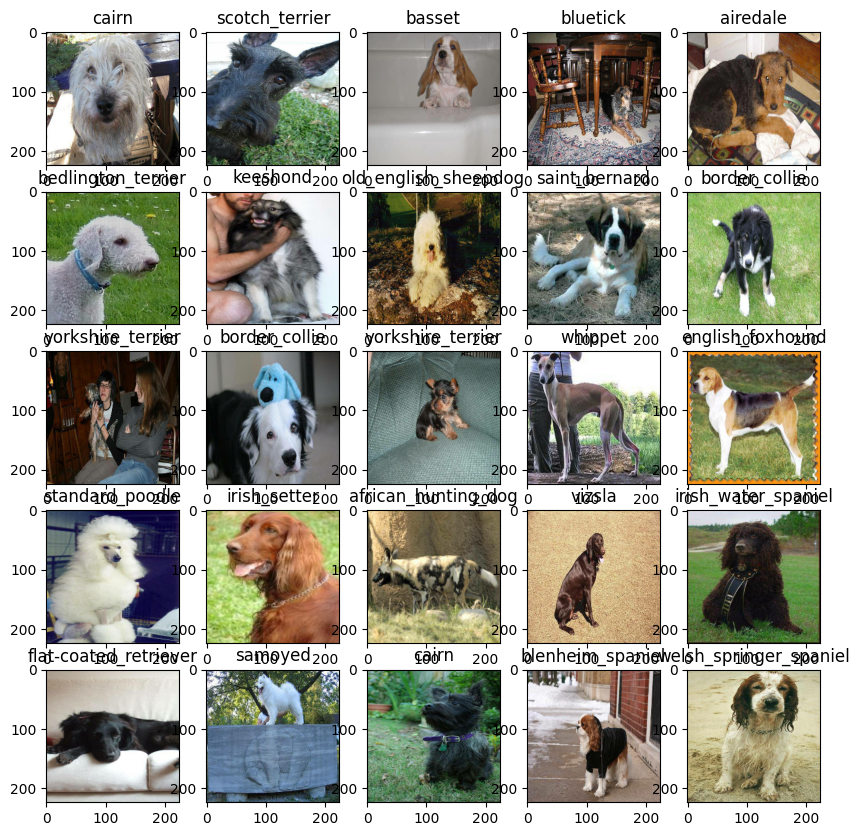

In [ ]:
# Visualizing our validation set

val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [ ]:
# Building a model

#Setup the input shape of the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] #batch,height,width,colour channels

# Setup the output shape of our modell
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"


Now we've got our inputs,outputs and models ready to go >We'llput them together into a Keras deep learningmodel

Knowing this,let's create a function which:

1. Takes input shape,output shape and the model we've chosen as paramters.
2. Defines the layers in a  Keras model in sequnetial fashion (do this first , the this ,the that).
3. Compiles the model (says it should be evaluated and improved).
4.Builds the model (tells the model the input shape it is getting)
5.Returns the model

In [ ]:
import tf_keras

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  #Setup model layers
  model = tf_keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer 1 input layer
      tf_keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax") #Layer 2 (output layer)
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  model.build(INPUT_SHAPE)
  return model



In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callback

In [ ]:
#Load Tensorflow notebook extension
%load_ext tensorboard


In [ ]:
import datetime

#Create a function to build a Tensorboard callback
def create_tensorboard_callback():
  #Create a log directory for storing Tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf_keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping#used-in-the-notebooks

In [ ]:
#Create early stopping callback
early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

### Training a model
Our first model trains only 1000 images to make sure the model is working without any issues

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,steps:10}


Creating a function which trains a model.

* Create a model using 'create_model()'
* Setup a Tensorboard callback using 'create_tensorboard_callback()'
* Call the fit() function on our model passing it onto training data,validation data,no. of epochs to train for
* Return Model

In [ ]:
#Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  #Create a new Tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it to the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            callbacks=[tensorboard,early_stopping])
  #Return the fitted model
  return model

In [ ]:
model = train_model()

Epoch 1/100
 1/25 [>.............................] - ETA: 19:52 - loss: 6.1772 - accuracy: 0.0000e+00

### Checking the Tensorboard logs created
The Tensorboard magic function(%tensorboard) will acces the logs direcotry we created earlier and visualize its contents


In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

In [ ]:
val_data

### Marking and evaluating predictions using a trained model    

In [ ]:
#Make predicition on the validation data
predictions = model.predict(val_data,verbose=1)
predictions


7/7 [==============================] - 13s 2s/step


array([[0.00514862, 0.00368759, 0.00274929, ..., 0.00132341, 0.00056485,
        0.00293781],
       [0.00218588, 0.00389016, 0.00533098, ..., 0.00181115, 0.00313987,
        0.00026722],
       [0.01561023, 0.00434747, 0.01002984, ..., 0.00156512, 0.16629682,
        0.0005205 ],
       ...,
       [0.00116767, 0.0010746 , 0.0029596 , ..., 0.00105733, 0.01822426,
        0.00649675],
       [0.00500191, 0.00158541, 0.01809905, ..., 0.01208882, 0.05495883,
        0.00932527],
       [0.00287296, 0.02660514, 0.00771024, ..., 0.00753569, 0.00234206,
        0.00163836]], dtype=float32)

In [ ]:
predictions.shape

In [ ]:
np.sum(predictions[0])

In [ ]:
# First prediction
index = 113
print(predictions[index])
print(f"Maxvalue (probability of prediction): {np.max(predictions[0])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


  Prediction probabilities are also known as confidence-levels

In [ ]:
# Turn the prediction probabiltis intot heir respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediciton probabilities into a  label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'airedale'

In [ ]:
def unbatchify(VAL):
  '''
  Takes a batched dataset of (image,label) Tensors and returns seperate arrays of images and labels.
  '''
  images_ = []
  labels_ = []
  for image,label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])
  return images_,labels_




In [ ]:
#Unbatching
val_images,val_labels = unbatchify(val_data)

In [ ]:
get_pred_label(predictions[1])

In [ ]:
get_pred_label(val_labels[1])

In [ ]:
def plot_pred(prediction_probabilties,labels,images, n):
  """
  VIew the prediction ,ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilties[n],labels[n], images[n]

  #Get the pred label
  pred_label = get_pred_label(pred_prob)

  #Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  # Change the colour of the title depending on if theprediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color= "red"

  # Change plot title to be predicted, probabiltiy of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),color = color)


In [ ]:
plot_pred(prediction_probabilties=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities,labels,n):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob,true_label = prediction_probabilities[n],labels[n]
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  #Find the top 10 prediction confidence levels
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  #Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  # Change color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass





In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=9)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Lets check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilties=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)

plt.show()

## Saving and loading our model

In [ ]:
#Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  #Creates a model directory pathame with current time
  modeldir = os.path.join("/content/drive/MyDrive/dog-vision/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))

  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}....")
  model.save(model_path)
  return model_path


In [ ]:
#Create a function to load a trained model
def load_model(model_path):
  """
  Loads a model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf_keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model (model,suffix="1000-images-mobilenetv2-Adam")

In [ ]:
#Load a trained model
loaded_1000_images_model = load_model('/content/drive/MyDrive/dog-vision/models/20241206-14121733494321-1000-images-mobilenetv2-Adam.h5')

### Training the big dog model on the full data




In [ ]:
len(x),len(y)

In [ ]:
# Creating a data batch with the full data set
full_data = create_data_batches(x,y)


Creating training data batches...


In [ ]:
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf_keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 592s 2s/step - loss: 1.3176 - accuracy: 0.6715
Epoch 2/100
320/320 [==============================] - 582s 2s/step - loss: 0.3959 - accuracy: 0.8846
Epoch 3/100
320/320 [==============================] - 664s 2s/step - loss: 0.2358 - accuracy: 0.9362
Epoch 4/100
320/320 [==============================] - 681s 2s/step - loss: 0.1546 - accuracy: 0.9615
Epoch 5/100
320/320 [==============================] - 587s 2s/step - loss: 0.1044 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 569s 2s/step - loss: 0.0781 - accuracy: 0.9854
Epoch 7/100
320/320 [==============================] - 564s 2s/step - loss: 0.0573 - accuracy: 0.9932
Epoch 8/100
320/320 [==============================] - 562s 2s/step - loss: 0.0449 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 563s 2s/step - loss: 0.0375 - accuracy: 0.9949
Epoch 10/100
320/320 [==============================] - 563s 2s/step - loss: 0.032

### Making predictions on the test dataset

Since our model has been trained in the form of Tensor batches,to make predictions on the test data,we'll have to get it into the same format

To make predictions on the test data,we'll:
* Get the test image filename
* Convert the filenames into test data batches using 'create_data_batches()' and setting the 'test_data' paramter to 'True.
* Make a prediction array bby passing the test batches to the 'predict()' method called on our model.

In [ ]:
# Load the test data filenamses
test_path = "/content/drive/MyDrive/dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]


['/content/drive/MyDrive/dog-vision/test/dea5b2d047b3cb7ce13234140c7bf5aa.jpg',
 '/content/drive/MyDrive/dog-vision/test/dcccc266ef919edbf3416078edc849db.jpg',
 '/content/drive/MyDrive/dog-vision/test/e60f6620bf8751538db9006d425f1b45.jpg',
 '/content/drive/MyDrive/dog-vision/test/e40a39dd88f04b29ab3cb3a986503f8f.jpg',
 '/content/drive/MyDrive/dog-vision/test/e193c532dc7c9a5ee397848a1ee007f0.jpg',
 '/content/drive/MyDrive/dog-vision/test/de9a61a532241cff14e732f43b646d9a.jpg',
 '/content/drive/MyDrive/dog-vision/test/e5b14b20ee8ac070bf5cea3b640f3dde.jpg',
 '/content/drive/MyDrive/dog-vision/test/e3b9e9c903bbcf09fc0da06efabaec1c.jpg',
 '/content/drive/MyDrive/dog-vision/test/e774fbfeb4b712ca042f93edea3835af.jpg',
 '/content/drive/MyDrive/dog-vision/test/e2a6dfb8127f801af0626f245f35441e.jpg']

In [ ]:
save_model (full_model,suffix="full-model-images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/dog-vision/models/20241206-18341733510051-full-model-images-mobilenetv2-Adam.h5....


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/dog-vision/models/20241206-18341733510051-full-model-images-mobilenetv2-Adam.h5'

In [ ]:
len(test_filenames)

10357

In [ ]:
comp_full_model = load_model("/content/drive/MyDrive/dog-vision/models/20241206-18341733510051-full-model-images-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/MyDrive/dog-vision/models/20241206-18341733510051-full-model-images-mobilenetv2-Adam.h5


In [ ]:
#Create test data batch
test_data = create_data_batches(test_filenames,test_data=True)


Creating test data batches....


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on test daya batch using the loaded full model
test_predictions = comp_full_model.predict(test_data)

324/324 [==============================] - 797s 2s/step


In [ ]:
# Save predictions (Numpy array to csv file (for access later))
np.savetxt('drive.My Drive/Dog Vision/',test_predictions, delimiter=",")

In [ ]:
# Load predictions (Numpy array from csv file )
test_predictions = np.loadtxt('drive/My Drive/Dog Vision/preds_array.csv',delimiter=",")


In [ ]:
test_predictions[:10],test_predictions.shape()